In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import re    
import os
import glob
#pip install khayyam -q
#from persiantools.jdatetime import JalaliDate
#pip install persiantools -q
from khayyam import *
train_dir=os.path.join("D:\\master\\social network\\Resources\\docker\\data\\new_stock__")
train = os.listdir(train_dir)

In [ ]:
trainlist =[]
for i in train: 
    if i.endswith(".xlsx"):
        trainlist = np.append(trainlist,i)

In [ ]:
trainlist

array(['1400-1-10.xlsx', '1400-1-11.xlsx', '1400-1-14.xlsx',
       '1400-1-15.xlsx', '1400-1-16.xlsx', '1400-1-17.xlsx',
       '1400-1-18.xlsx', '1400-1-21.xlsx', '1400-1-22.xlsx',
       '1400-1-23.xlsx', '1400-1-24.xlsx', '1400-1-25.xlsx',
       '1400-1-28.xlsx', '1400-1-29.xlsx', '1400-1-30.xlsx',
       '1400-1-7.xlsx', '1400-1-8.xlsx', '1400-10-1.xlsx',
       '1400-10-11.xlsx', '1400-10-12.xlsx', '1400-10-13.xlsx',
       '1400-10-14.xlsx', '1400-10-15.xlsx', '1400-10-18.xlsx',
       '1400-10-19.xlsx', '1400-10-20.xlsx', '1400-10-21.xlsx',
       '1400-10-22.xlsx', '1400-10-25.xlsx', '1400-10-26.xlsx',
       '1400-10-27.xlsx', '1400-10-28.xlsx', '1400-10-29.xlsx',
       '1400-10-4.xlsx', '1400-10-5.xlsx', '1400-10-6.xlsx',
       '1400-10-7.xlsx', '1400-10-8.xlsx', '1400-11-2.xlsx',
       '1400-11-3.xlsx', '1400-2-1.xlsx', '1400-2-11.xlsx',
       '1400-2-12.xlsx', '1400-2-13.xlsx', '1400-2-15.xlsx',
       '1400-2-18.xlsx', '1400-2-19.xlsx', '1400-2-20.xlsx',
       '1400

In [ ]:
for excelfile in trainlist:
    data = pd.read_excel("D://master/social network/Resources/docker/data/new_stock__/"+excelfile)
    new_header = data.iloc[1] #grab the first row for the header
    data = data[2:] #take the data less the header row
    data.columns = new_header
    data.columns.name = 'index'
    data=data.reset_index(drop=True)
    excelfile = excelfile[:-5]
   # if excelfile[]
    data['تاریخ']=  excelfile
    data['gregorian_date']=data['تاریخ'].apply(lambda x :JalaliDate(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])).todate())
    data.to_csv("D://master/social network/Resources/docker/data/csv__/"+excelfile+'.csv')

In [ ]:
train_dir_csv=os.path.join("D:\\master\\social network\\Resources\\docker\\data\\csv__")
train_csv = os.listdir(train_dir_csv)
train_csv

['1400-1-10.csv',
 '1400-1-11.csv',
 '1400-1-14.csv',
 '1400-1-15.csv',
 '1400-1-16.csv',
 '1400-1-17.csv',
 '1400-1-18.csv',
 '1400-1-21.csv',
 '1400-1-22.csv',
 '1400-1-23.csv',
 '1400-1-24.csv',
 '1400-1-25.csv',
 '1400-1-28.csv',
 '1400-1-29.csv',
 '1400-1-30.csv',
 '1400-1-7.csv',
 '1400-1-8.csv',
 '1400-10-1.csv',
 '1400-10-11.csv',
 '1400-10-12.csv',
 '1400-10-13.csv',
 '1400-10-14.csv',
 '1400-10-15.csv',
 '1400-10-18.csv',
 '1400-10-19.csv',
 '1400-10-20.csv',
 '1400-10-21.csv',
 '1400-10-22.csv',
 '1400-10-25.csv',
 '1400-10-26.csv',
 '1400-10-27.csv',
 '1400-10-28.csv',
 '1400-10-29.csv',
 '1400-10-4.csv',
 '1400-10-5.csv',
 '1400-10-6.csv',
 '1400-10-7.csv',
 '1400-10-8.csv',
 '1400-11-2.csv',
 '1400-11-3.csv',
 '1400-2-1.csv',
 '1400-2-11.csv',
 '1400-2-12.csv',
 '1400-2-13.csv',
 '1400-2-15.csv',
 '1400-2-18.csv',
 '1400-2-19.csv',
 '1400-2-20.csv',
 '1400-2-21.csv',
 '1400-2-22.csv',
 '1400-2-25.csv',
 '1400-2-26.csv',
 '1400-2-27.csv',
 '1400-2-28.csv',
 '1400-2-29.csv'

In [ ]:
trainlist_csv =[]
for i in train_csv: 
    if i.endswith(".csv"):
        trainlist_csv = np.append(train_csv,i)

In [ ]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

# خودرو _نماد مبهم

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خودرو'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khodro/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khodro/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khodro = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khodro.to_csv( "khodro.csv", index=False, encoding='utf-8-sig')

In [ ]:
khodro = pd.read_csv("D://master/social network/Resources/docker/data/khodro/khodro.csv")
khodro

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,30,خودرو,ايران‌ خودرو,5127,123895903,322767657850,2650,2640.0,2600.0,-50.0,-1.89,2610.0,-40.0,-1.51,2600.0,2640.0,1400-1-10,2021-03-30
1,69,خودرو,ايران‌ خودرو,2659,78264146,200367932220,2610,2560.0,2560.0,-50.0,-1.92,2560.0,-50.0,-1.92,2560.0,2580.0,1400-1-11,2021-03-31
2,90,خودرو,ايران‌ خودرو,962,22306197,55988554470,2560,2510.0,2510.0,-50.0,-1.95,2540.0,-20.0,-0.78,2510.0,2510.0,1400-1-14,2021-04-03
3,64,خودرو,ايران‌ خودرو,830,21634453,53869787970,2540,2490.0,2490.0,-50.0,-1.97,2520.0,-20.0,-0.79,2490.0,2490.0,1400-1-15,2021-04-04
4,53,خودرو,ايران‌ خودرو,2232,61027532,150738004040,2520,2470.0,2470.0,-50.0,-1.98,2470.0,-50.0,-1.98,2470.0,2470.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,خودرو,ايران‌ خودرو,17475,733471286,1370244919683,1921,1890.0,1856.0,-65.0,-3.38,1868.0,-53.0,-2.76,1825.0,1950.0,1400-9-24,2021-12-15
170,1,خودرو,ايران‌ خودرو,16307,701269890,1369913720021,1868,1900.0,1961.0,93.0,4.98,1953.0,85.0,4.55,1890.0,1961.0,1400-9-27,2021-12-18
171,3,خودرو,ايران‌ خودرو,11188,438255155,822100160745,1953,1965.0,1856.0,-97.0,-4.97,1876.0,-77.0,-3.94,1856.0,1970.0,1400-9-28,2021-12-19
172,2,خودرو,ايران‌ خودرو,11061,370934374,689335824245,1876,1841.0,1880.0,4.0,0.21,1858.0,-18.0,-0.96,1802.0,1909.0,1400-9-29,2021-12-20


In [ ]:
khodro = khodro.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khodro=khodro.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khodro = khodro.sort_values(by="gregorian_date")
khodro['Close'] = khodro['Close'].to_frame()
khodro['SMA5'] = khodro['Close'].rolling(5).mean()
khodro['EWMA5'] = khodro['Close'].ewm(span=5).mean()
khodro['RSI'] = computeRSI(khodro['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khodro.to_csv('D://master/social network/Resources/docker/data/final__/khodro.csv',index=False)

khodro

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
15,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,NaN,2630.000000,NaN
16,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,NaN,2642.000000,NaN
0,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,NaN,2626.842105,NaN
1,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,NaN,2599.076923,NaN
2,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.0,2576.398104,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.2,1996.632525,56.742284
31,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.8,1980.088350,50.065500
32,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.8,1964.725567,49.135117
38,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.8,1947.150378,47.525533


In [ ]:
khodro_ = pd.read_csv("D://master/social network/Resources/docker/data/final_/khodro.csv")


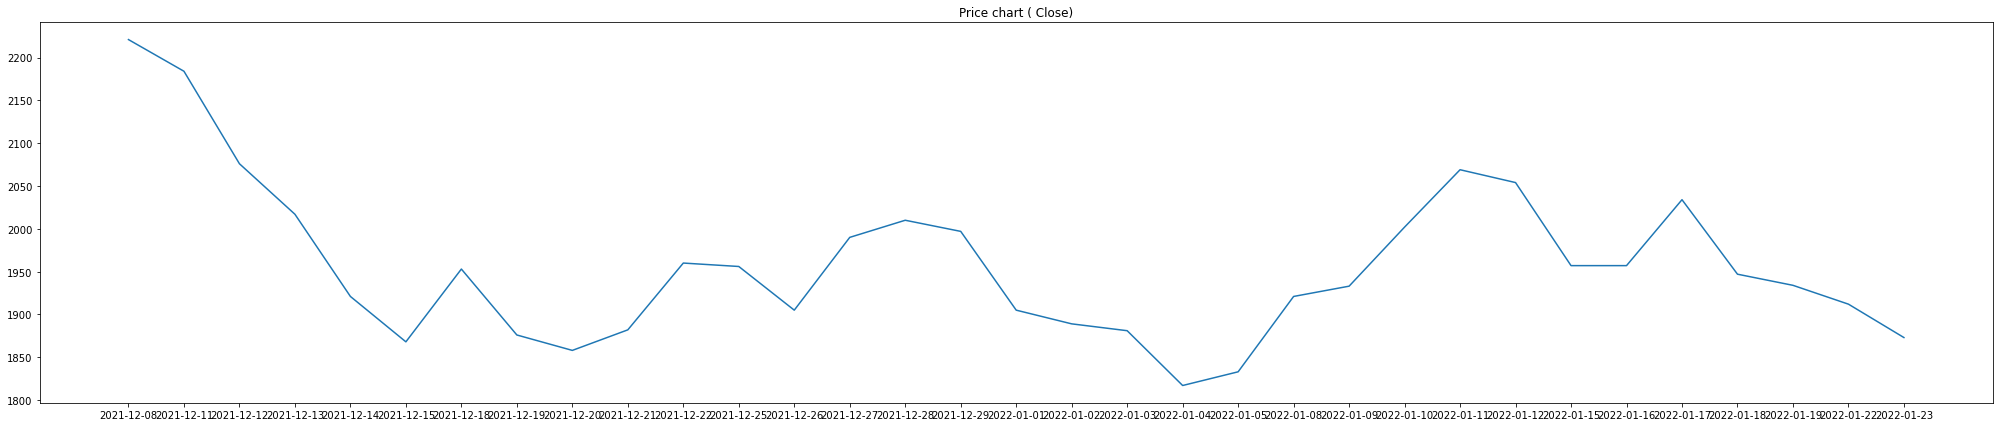

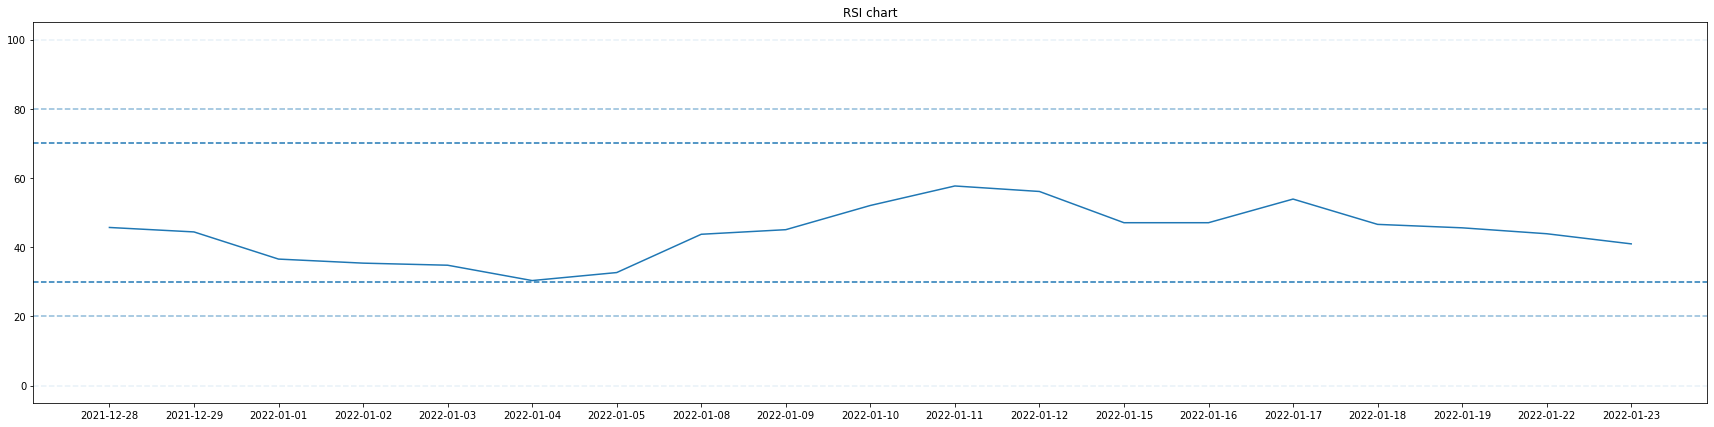

In [ ]:
# plot price
plt.figure(figsize=(35,7))
plt.plot(khodro_['gregorian_date'], khodro_['Close'])
plt.title('Price chart ( Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(30,7))
plt.title('RSI chart')
plt.plot(khodro_['gregorian_date'], khodro_['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

# خشرق

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خشرق'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khashregh/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khashregh/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khashregh = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khashregh.to_csv( "khashregh.csv", index=False, encoding='utf-8-sig')

In [ ]:
khashregh = pd.read_csv("D://master/social network/Resources/docker/data/khashregh/khashregh.csv")
khashregh

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,213,خشرق,الكتريك‌ خودرو شرق‌,714,2952101,45357596660,15670,15360.0,15360.0,-310.0,-1.98,15380.0,-290.0,-1.85,15360.0,15600.0,1400-1-10,2021-03-30
1,164,خشرق,الكتريك‌ خودرو شرق‌,992,2900818,43838345780,15380,15150.0,15080.0,-300.0,-1.95,15130.0,-250.0,-1.63,15080.0,15560.0,1400-1-11,2021-03-31
2,182,خشرق,الكتريك‌ خودرو شرق‌,402,1495694,22183692970,15130,14840.0,14830.0,-300.0,-1.98,14990.0,-140.0,-0.93,14830.0,15000.0,1400-1-14,2021-04-03
3,458,خشرق,الكتريك‌ خودرو شرق‌,22,93609,1376052300,14990,14700.0,14700.0,-290.0,-1.93,14980.0,-10.0,-0.07,14700.0,14700.0,1400-1-15,2021-04-04
4,515,خشرق,الكتريك‌ خودرو شرق‌,17,62253,914496570,14980,14690.0,14690.0,-290.0,-1.94,14970.0,-10.0,-0.07,14690.0,14690.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,381,خشرق,الكتريك‌ خودرو شرق‌,302,1093225,10982145950,9840,9920.0,10050.0,210.0,2.13,9990.0,150.0,1.52,9690.0,10200.0,1400-9-30,2021-12-21
187,219,خشرق,الكتريك‌ خودرو شرق‌,738,2974867,42047431960,14170,14000.0,13980.0,-190.0,-1.34,14130.0,-40.0,-0.28,13750.0,14500.0,1400-9-6,2021-11-27
188,291,خشرق,الكتريك‌ خودرو شرق‌,522,1648240,22952462000,14130,13680.0,13840.0,-290.0,-2.05,13930.0,-200.0,-1.42,13680.0,14360.0,1400-9-7,2021-11-28
189,325,خشرق,الكتريك‌ خودرو شرق‌,438,1770719,24943994040,13930,14090.0,13930.0,0.0,0.00,14090.0,160.0,1.15,13700.0,14290.0,1400-9-8,2021-11-29


In [ ]:
khashregh = khashregh.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khashregh=khashregh.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khashregh = khashregh.sort_values(by="gregorian_date")
khashregh['Close'] = khashregh['Close'].to_frame()
khashregh['SMA5'] = khashregh['Close'].rolling(5).mean()
khashregh['EWMA5'] = khashregh['Close'].ewm(span=5).mean()
khashregh['RSI'] = computeRSI(khashregh['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khashregh.to_csv('D://master/social network/Resources/docker/data/final__/khashregh.csv',index=False)

khashregh

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
15,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,NaN,15880.000000,NaN
16,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,NaN,15754.000000,NaN
0,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,NaN,15576.842105,NaN
1,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,NaN,15391.230769,NaN
2,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.0,15237.203791,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.0,10988.199738,40.789492
31,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.0,10815.466492,37.232378
32,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.0,10596.977661,34.127462
38,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.0,10361.318441,31.651679


# خلنت

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خلنت'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khalnat/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khalnat/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khalnat = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khalnat.to_csv( "khalnat.csv", index=False, encoding='utf-8-sig')

In [ ]:
khalnat = pd.read_csv("D://master/social network/Resources/docker/data/khalnat/khalnat.csv")
khalnat

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,475,خلنت,لنت‌ ترمزايران‌,56,21502,1971948420,93580,91710.0,91710.0,-1870.0,-2.00,93500.0,-80.0,-0.09,91710.0,91710.0,1400-1-10,2021-03-30
1,578,خلنت,لنت‌ ترمزايران‌,21,3888,356257440,93500,91630.0,91630.0,-1870.0,-2.00,93490.0,-10.0,-0.01,91630.0,91630.0,1400-1-11,2021-03-31
2,640,خلنت,لنت‌ ترمزايران‌,8,2310,211665300,93490,91630.0,91630.0,-1860.0,-1.99,93480.0,-10.0,-0.01,91630.0,91630.0,1400-1-14,2021-04-03
3,713,خلنت,لنت‌ ترمزايران‌,3,591,54147420,93480,91620.0,91620.0,-1860.0,-1.99,93480.0,0.0,0.00,91620.0,91620.0,1400-1-15,2021-04-04
4,578,خلنت,لنت‌ ترمزايران‌,10,5267,482562540,93480,91620.0,91620.0,-1860.0,-1.99,93460.0,-20.0,-0.02,91620.0,91620.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,530,خلنت,لنت‌ ترمزايران‌,177,210862,11838400300,53660,55980.0,56340.0,2680.0,4.99,55590.0,1930.0,3.60,53690.0,56340.0,1400-9-30,2021-12-21
173,230,خلنت,لنت‌ ترمزايران‌,690,386773,29005278870,72350,74980.0,75960.0,3610.0,4.99,74990.0,2640.0,3.65,72360.0,75960.0,1400-9-6,2021-11-27
174,199,خلنت,لنت‌ ترمزايران‌,807,427636,32053466830,74990,77800.0,76340.0,1350.0,1.80,74960.0,-30.0,-0.04,72200.0,77800.0,1400-9-7,2021-11-28
175,322,خلنت,لنت‌ ترمزايران‌,443,303018,22850137550,74960,76400.0,74880.0,-80.0,-0.11,75410.0,450.0,0.60,74000.0,77050.0,1400-9-8,2021-11-29


In [ ]:
khalnat = khalnat.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khalnat=khalnat.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khalnat = khalnat.sort_values(by="gregorian_date")
khalnat['Close'] = khalnat['Close'].to_frame()
khalnat['SMA5'] = khalnat['Close'].rolling(5).mean()
khalnat['EWMA5'] = khalnat['Close'].ewm(span=5).mean()
khalnat['RSI'] = computeRSI(khalnat['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khalnat.to_csv('D://master/social network/Resources/docker/data/final__/khalnat.csv',index=False)

khalnat

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
8,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,NaN,93610.000000,NaN
9,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,NaN,93592.000000,NaN
0,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,NaN,93548.421053,NaN
1,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,NaN,93524.153846,NaN
2,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.0,93507.203791,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.0,66365.587964,55.631208
24,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.0,65670.391976,49.691639
25,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.0,65310.261317,50.313052
31,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.0,64643.507545,47.693470


# خساپا

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خساپا'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khasapa/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khasapa/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khasapa = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khasapa.to_csv( "khasapa.csv", index=False, encoding='utf-8-sig')

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خمهر'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khamhar/'+j)

In [ ]:
khasapa = pd.read_csv("D://master/social network/Resources/docker/data/khasapa/khasapa.csv")
khasapa

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,13,خساپا,سايپا,9664,357589439,875005528720,2480,2470.0,2440.0,-40.0,-1.61,2450.0,-30.0,-1.21,2440.0,2480.0,1400-1-10,2021-03-30
1,117,خساپا,سايپا,1444,46336832,111687204640,2450,2410.0,2410.0,-40.0,-1.63,2410.0,-40.0,-1.63,2410.0,2430.0,1400-1-11,2021-03-31
2,142,خساپا,سايپا,552,12418780,29432508600,2410,2370.0,2370.0,-40.0,-1.66,2400.0,-10.0,-0.41,2370.0,2370.0,1400-1-14,2021-04-03
3,123,خساپا,سايپا,390,12629379,29805334440,2400,2360.0,2360.0,-40.0,-1.67,2390.0,-10.0,-0.42,2360.0,2360.0,1400-1-15,2021-04-04
4,93,خساپا,سايپا,1087,53498173,125720706550,2390,2350.0,2350.0,-40.0,-1.67,2350.0,-40.0,-1.67,2350.0,2350.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2,خساپا,سايپا,8784,358476424,547801393559,1547,1529.0,1530.0,-17.0,-1.10,1528.0,-19.0,-1.23,1478.0,1589.0,1400-9-24,2021-12-15
171,6,خساپا,سايپا,6860,434443625,696458222009,1528,1588.0,1604.0,76.0,4.97,1603.0,75.0,4.91,1575.0,1604.0,1400-9-27,2021-12-18
172,5,خساپا,سايپا,10198,458083720,711086738760,1603,1625.0,1523.0,-80.0,-4.99,1552.0,-51.0,-3.18,1523.0,1628.0,1400-9-28,2021-12-19
173,8,خساپا,سايپا,6712,247397743,388786003650,1552,1550.0,1570.0,18.0,1.16,1572.0,20.0,1.29,1524.0,1610.0,1400-9-29,2021-12-20


In [ ]:
khasapa = khasapa.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khasapa=khasapa.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khasapa = khasapa.sort_values(by="gregorian_date")
khasapa['Close'] = khasapa['Close'].to_frame()
khasapa['SMA5'] = khasapa['Close'].rolling(5).mean()
khasapa['EWMA5'] = khasapa['Close'].ewm(span=5).mean()
khasapa['RSI'] = computeRSI(khasapa['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khasapa.to_csv('D://master/social network/Resources/docker/data/final__/khasapa.csv',index=False)

khasapa

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
15,2370.0,2320.0,2500.0,2450.0,1400-1-7,خساپا,1441935998,2021-03-27,NaN,2450.000000,NaN
16,2500.0,2420.0,2560.0,2480.0,1400-1-8,خساپا,796064822,2021-03-28,NaN,2468.000000,NaN
0,2470.0,2440.0,2480.0,2450.0,1400-1-10,خساپا,357589439,2021-03-30,NaN,2459.473684,NaN
1,2410.0,2410.0,2430.0,2410.0,1400-1-11,خساپا,46336832,2021-03-31,NaN,2438.923077,NaN
2,2370.0,2370.0,2370.0,2400.0,1400-1-14,خساپا,12418780,2021-04-03,2438.0,2423.981043,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30,1650.0,1611.0,1690.0,1653.0,1400-10-27,خساپا,221654898,2022-01-17,1664.8,1654.056124,49.512716
31,1620.0,1571.0,1639.0,1577.0,1400-10-28,خساپا,230409293,2022-01-18,1636.2,1628.370749,42.379939
32,1574.0,1545.0,1617.0,1580.0,1400-10-29,خساپا,147009186,2022-01-19,1612.2,1612.247166,42.730655
38,1600.0,1511.0,1613.0,1552.0,1400-11-2,خساپا,170257245,2022-01-22,1597.2,1592.164777,40.267141


# خگستر

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خگستر'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khagestar/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khagestar/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khagestar = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khagestar.to_csv( "khagestar.csv", index=False, encoding='utf-8-sig')

In [ ]:
khagestar = pd.read_csv("D://master/social network/Resources/docker/data/khagestar/khagestar.csv")
khagestar

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,23,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,5755,129292120,391357495150,3080,3060.0,3020.0,-60.0,-1.95,3030.0,-50.0,-1.62,3020.0,3070.0,1400-1-10,2021-03-30
1,128,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,1280,22512012,66877408280,3030,2970.0,2970.0,-60.0,-1.98,2970.0,-60.0,-1.98,2970.0,3000.0,1400-1-11,2021-03-31
2,162,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,464,6651446,19422222320,2970,2920.0,2920.0,-50.0,-1.68,2950.0,-20.0,-0.67,2920.0,2920.0,1400-1-14,2021-04-03
3,175,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,252,1727340,5009286000,2950,2900.0,2900.0,-50.0,-1.69,2940.0,-10.0,-0.34,2900.0,2900.0,1400-1-15,2021-04-04
4,157,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,483,10195189,29464096210,2940,2890.0,2890.0,-50.0,-1.70,2910.0,-30.0,-1.02,2890.0,2890.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,21,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,3624,96516577,208636334447,2131,2135.0,2150.0,19.0,0.89,2162.0,31.0,1.45,2105.0,2220.0,1400-9-30,2021-12-21
191,8,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,8471,213457231,550543126943,2639,2600.0,2550.0,-89.0,-3.37,2579.0,-60.0,-2.27,2508.0,2674.0,1400-9-6,2021-11-27
192,15,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,6223,142934968,372899180846,2579,2530.0,2584.0,5.0,0.19,2609.0,30.0,1.16,2530.0,2659.0,1400-9-7,2021-11-28
193,12,خگستر,گسترش‌سرمايه‌گذاري‌ايران‌خودرو,6622,147820287,394280948875,2609,2620.0,2635.0,26.0,1.00,2667.0,58.0,2.22,2583.0,2730.0,1400-9-8,2021-11-29


In [ ]:
khagestar = khagestar.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khagestar=khagestar.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khagestar = khagestar.sort_values(by="gregorian_date")
khagestar['Close'] = khagestar['Close'].to_frame()
khagestar['SMA5'] = khagestar['Close'].rolling(5).mean()
khagestar['EWMA5'] = khagestar['Close'].ewm(span=5).mean()
khagestar['RSI'] = computeRSI(khagestar['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khagestar.to_csv('D://master/social network/Resources/docker/data/final__/khagestar.csv',index=False)

khagestar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
15,2900.0,2850.0,3070.0,3020.0,1400-1-7,خگستر,385926596,2021-03-27,NaN,3020.000000,NaN
16,3100.0,3000.0,3190.0,3080.0,1400-1-8,خگستر,332963922,2021-03-28,NaN,3056.000000,NaN
0,3060.0,3020.0,3070.0,3030.0,1400-1-10,خگستر,129292120,2021-03-30,NaN,3043.684211,NaN
1,2970.0,2970.0,3000.0,2970.0,1400-1-11,خگستر,22512012,2021-03-31,NaN,3013.076923,NaN
2,2920.0,2920.0,2920.0,2950.0,1400-1-14,خگستر,6651446,2021-04-03,3010.0,2988.862559,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30,2509.0,2426.0,2567.0,2503.0,1400-10-27,خگستر,124679385,2022-01-17,2506.8,2475.495420,57.536243
31,2441.0,2378.0,2482.0,2395.0,1400-10-28,خگستر,83742375,2022-01-18,2478.4,2448.663614,50.593710
32,2360.0,2285.0,2430.0,2362.0,1400-10-29,خگستر,106399324,2022-01-19,2436.2,2419.775742,48.661575
38,2340.0,2244.0,2423.0,2286.0,1400-11-2,خگستر,157427597,2022-01-22,2399.2,2375.183828,44.451307


# خمهر

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خمهر'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khamhar/'+j)

In [ ]:

os.chdir("D://master/social network/Resources/docker/data/khamhar/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khamhar = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khamhar.to_csv( "khamhar.csv", index=False, encoding='utf-8-sig')

In [ ]:
khamhar = pd.read_csv("D://master/social network/Resources/docker/data/khamhar/khamhar.csv")
khamhar

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,330,خمهر,مهركام‌پارس‌,285,5140265,12452641210,2460,2420.0,2420.0,-40.0,-1.63,2450.0,-10.0,-0.41,2420.0,2470.0,1400-1-10,2021-03-30
1,469,خمهر,مهركام‌پارس‌,57,405142,976392220,2450,2410.0,2410.0,-40.0,-1.63,2450.0,0.0,0.00,2410.0,2410.0,1400-1-11,2021-03-31
2,496,خمهر,مهركام‌پارس‌,29,191013,460341330,2450,2410.0,2410.0,-40.0,-1.63,2450.0,0.0,0.00,2410.0,2410.0,1400-1-14,2021-04-03
3,537,خمهر,مهركام‌پارس‌,12,40190,96857900,2450,2410.0,2410.0,-40.0,-1.63,2450.0,0.0,0.00,2410.0,2410.0,1400-1-15,2021-04-04
4,506,خمهر,مهركام‌پارس‌,18,62723,151162430,2450,2410.0,2410.0,-40.0,-1.63,2450.0,0.0,0.00,2410.0,2410.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,231,خمهر,مهركام‌پارس‌,580,22034845,38022187469,1656,1680.0,1738.0,82.0,4.95,1726.0,70.0,4.23,1620.0,1738.0,1400-9-30,2021-12-21
180,234,خمهر,مهركام‌پارس‌,669,13306999,25059584833,1907,1900.0,1841.0,-66.0,-3.46,1883.0,-24.0,-1.26,1828.0,1955.0,1400-9-6,2021-11-27
181,244,خمهر,مهركام‌پارس‌,664,17289842,32600909289,1883,1832.0,1878.0,-5.0,-0.27,1886.0,3.0,0.16,1832.0,1946.0,1400-9-7,2021-11-28
182,266,خمهر,مهركام‌پارس‌,562,25651855,50783603983,1886,1980.0,1980.0,94.0,4.98,1980.0,94.0,4.98,1950.0,1980.0,1400-9-8,2021-11-29


In [ ]:
khamhar = khamhar.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khamhar=khamhar.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khamhar = khamhar.sort_values(by="gregorian_date")
khamhar['Close'] = khamhar['Close'].to_frame()
khamhar['SMA5'] = khamhar['Close'].rolling(5).mean()
khamhar['EWMA5'] = khamhar['Close'].ewm(span=5).mean()
khamhar['RSI'] = computeRSI(khamhar['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khamhar.to_csv('D://master/social network/Resources/docker/data/final__/khamhar.csv',index=False)

khamhar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
15,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,NaN,2470.000000,NaN
16,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,NaN,2464.000000,NaN
0,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,NaN,2457.368421,NaN
1,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,NaN,2454.307692,NaN
2,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.0,2452.654028,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.2,1781.531362,45.769566
31,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.2,1742.687575,39.706411
32,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.2,1722.125050,41.339312
38,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.4,1685.083366,36.661319


# خزر _ نماد مبهم

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خزر'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khazar/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khazar/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khazar = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khazar.to_csv( "khazar.csv", index=False, encoding='utf-8-sig')

In [ ]:
khazar = pd.read_csv("D://master/social network/Resources/docker/data/khazar/khazar.csv")
khazar

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,530,خزر,فنرسازي‌زر,35,38078,1743210840,47680,45780.0,45780.0,-1900.0,-3.98,47610.0,-70.0,-0.15,45780.0,45780.0,1400-1-10,2021-03-30
1,677,خزر,فنرسازي‌زر,8,11229,523945140,47610,46660.0,46660.0,-950.0,-2.00,47600.0,-10.0,-0.02,46660.0,46660.0,1400-1-11,2021-03-31
2,689,خزر,فنرسازي‌زر,5,11683,545011950,47600,46650.0,46650.0,-950.0,-2.00,47590.0,-10.0,-0.02,46650.0,46650.0,1400-1-14,2021-04-03
3,701,خزر,فنرسازي‌زر,3,2230,104007200,47590,46640.0,46640.0,-950.0,-2.00,47590.0,0.0,0.00,46640.0,46640.0,1400-1-15,2021-04-04
4,787,خزر,فنرسازي‌زر,2,6813,317758320,47590,46640.0,46640.0,-950.0,-2.00,47580.0,-10.0,-0.02,46640.0,46640.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,230,خزر,فنرسازي‌زر,580,2441169,21770567820,8720,9050.0,8920.0,200.0,2.29,8920.0,200.0,2.29,8560.0,9050.0,1400-9-30,2021-12-21
182,102,خزر,فنرسازي‌زر,1651,6382421,78037562540,12650,12250.0,12040.0,-610.0,-4.82,12230.0,-420.0,-3.32,12020.0,12740.0,1400-9-6,2021-11-27
183,127,خزر,فنرسازي‌زر,1203,4056754,48160728890,12230,11810.0,11700.0,-530.0,-4.33,11870.0,-360.0,-2.94,11640.0,12450.0,1400-9-7,2021-11-28
184,129,خزر,فنرسازي‌زر,1266,4224462,50660638050,11870,11890.0,12030.0,160.0,1.35,11990.0,120.0,1.01,11680.0,12330.0,1400-9-8,2021-11-29


In [ ]:
khazar = khazar.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khazar=khazar.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khazar = khazar.sort_values(by="gregorian_date")
khazar['Close'] = khazar['Close'].to_frame()
khazar['SMA5'] = khazar['Close'].rolling(5).mean()
khazar['EWMA5'] = khazar['Close'].ewm(span=5).mean()
khazar['RSI'] = computeRSI(khazar['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khazar.to_csv('D://master/social network/Resources/docker/data/final__/khazar.csv',index=False)

khazar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
13,46790.0,46790.0,46790.0,47690.0,1400-1-7,خزر,54147,2021-03-27,NaN,47690.000000,NaN
14,46740.0,46740.0,46740.0,47680.0,1400-1-8,خزر,11775,2021-03-28,NaN,47684.000000,NaN
0,45780.0,45780.0,45780.0,47610.0,1400-1-10,خزر,38078,2021-03-30,NaN,47648.947368,NaN
1,46660.0,46660.0,46660.0,47600.0,1400-1-11,خزر,11229,2021-03-31,NaN,47628.615385,NaN
2,46650.0,46650.0,46650.0,47590.0,1400-1-14,خزر,11683,2021-04-03,47634.0,47613.791469,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28,9570.0,8810.0,9580.0,9070.0,1400-10-27,خزر,4109608,2022-01-17,9256.0,9239.229112,40.841114
29,8890.0,8620.0,8890.0,8650.0,1400-10-28,خزر,2078213,2022-01-18,9066.0,9042.819408,36.150925
30,8340.0,8230.0,8720.0,8410.0,1400-10-29,خزر,3142764,2022-01-19,8876.0,8831.879605,33.764746
36,8540.0,8050.0,8700.0,8310.0,1400-11-2,خزر,2465315,2022-01-22,8742.0,8657.919737,32.793466


# خوساز

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خوساز'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khosaz/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khosaz/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khosaz = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khosaz.to_csv( "khosaz.csv", index=False, encoding='utf-8-sig')

In [ ]:
khosaz = pd.read_csv("D://master/social network/Resources/docker/data/khosaz/khosaz.csv")
khosaz

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,639,خوساز,محورسازان‌ايران‌خودرو,10,23873,187641780,8020,7860.0,7860.0,-160.0,-2.00,8020.0,0.0,0.00,7860.0,7860.0,1400-1-10,2021-03-30
1,615,خوساز,محورسازان‌ايران‌خودرو,14,21119,165995340,8020,7860.0,7860.0,-160.0,-2.00,8020.0,0.0,0.00,7860.0,7860.0,1400-1-11,2021-03-31
2,750,خوساز,محورسازان‌ايران‌خودرو,2,8307,65293020,8020,7860.0,7860.0,-160.0,-2.00,8020.0,0.0,0.00,7860.0,7860.0,1400-1-14,2021-04-03
3,703,خوساز,محورسازان‌ايران‌خودرو,3,2700,21222000,8020,7860.0,7860.0,-160.0,-2.00,8020.0,0.0,0.00,7860.0,7860.0,1400-1-15,2021-04-04
4,788,خوساز,محورسازان‌ايران‌خودرو,2,10645,83669700,8020,7860.0,7860.0,-160.0,-2.00,8020.0,0.0,0.00,7860.0,7860.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,403,خوساز,محورسازان‌ايران‌خودرو,278,2420074,15213708680,6250,6070.0,6260.0,10.0,0.16,6290.0,40.0,0.64,6060.0,6510.0,1400-9-30,2021-12-21
183,263,خوساز,محورسازان‌ايران‌خودرو,592,6181817,47817867980,8090,8150.0,7690.0,-400.0,-4.94,7740.0,-350.0,-4.33,7690.0,8160.0,1400-9-6,2021-11-27
184,416,خوساز,محورسازان‌ايران‌خودرو,320,2061526,15708840250,7740,7500.0,7520.0,-220.0,-2.84,7620.0,-120.0,-1.55,7410.0,7880.0,1400-9-7,2021-11-28
185,352,خوساز,محورسازان‌ايران‌خودرو,398,2658141,20084360010,7620,7370.0,7500.0,-120.0,-1.57,7560.0,-60.0,-0.79,7360.0,7900.0,1400-9-8,2021-11-29


In [ ]:
khosaz = khosaz.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khosaz=khosaz.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khosaz = khosaz.sort_values(by="gregorian_date")
khosaz['Close'] = khosaz['Close'].to_frame()
khosaz['SMA5'] = khosaz['Close'].rolling(5).mean()
khosaz['EWMA5'] = khosaz['Close'].ewm(span=5).mean()
khosaz['RSI'] = computeRSI(khosaz['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khosaz.to_csv('D://master/social network/Resources/docker/data/final__/khosaz.csv',index=False)

khosaz

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
12,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,NaN,8020.000000,NaN
13,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,NaN,8020.000000,NaN
0,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,NaN,8020.000000,NaN
1,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,NaN,8020.000000,NaN
2,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.0,8020.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.0,6792.001934,39.901686
28,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.0,6668.001289,35.530028
29,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.0,6555.334193,33.819875
35,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.0,6456.889462,32.509227


# خپارس

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='خپارس'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khapares/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khapares/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khapares = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khapares.to_csv( "khapares.csv", index=False, encoding='utf-8-sig')

In [ ]:
khapares = pd.read_csv("D://master/social network/Resources/docker/data/khapares/khapares.csv")
khapares

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,27,خپارس,پارس‌ خودرو,5216,61489110,380866600960,6250,6210.0,6210.0,-40.0,-0.64,6190.0,-60.0,-0.96,6130.0,6350.0,1400-1-10,2021-03-30
1,35,خپارس,پارس‌ خودرو,4104,44631861,274958451070,6190,6170.0,6140.0,-50.0,-0.81,6160.0,-30.0,-0.48,6070.0,6310.0,1400-1-11,2021-03-31
2,124,خپارس,پارس‌ خودرو,668,9232003,55908315150,6160,6150.0,6040.0,-120.0,-1.95,6060.0,-100.0,-1.62,6040.0,6150.0,1400-1-14,2021-04-03
3,238,خپارس,پارس‌ خودرو,145,2633414,15642479160,6060,5940.0,5940.0,-120.0,-1.98,6030.0,-30.0,-0.50,5940.0,5940.0,1400-1-15,2021-04-04
4,251,خپارس,پارس‌ خودرو,180,2118308,12519200280,6030,5910.0,5910.0,-120.0,-1.99,6000.0,-30.0,-0.50,5910.0,5910.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,15,خپارس,پارس‌ خودرو,4990,189547284,187289561174,1008,985.0,984.0,-24.0,-2.38,988.0,-20.0,-1.98,958.0,1032.0,1400-9-24,2021-12-15
134,14,خپارس,پارس‌ خودرو,4373,205868983,211682389303,988,1000.0,1035.0,47.0,4.76,1028.0,40.0,4.05,1000.0,1037.0,1400-9-27,2021-12-18
135,24,خپارس,پارس‌ خودرو,4186,172154032,170103535611,1028,1036.0,977.0,-51.0,-4.96,988.0,-40.0,-3.89,977.0,1036.0,1400-9-28,2021-12-19
136,20,خپارس,پارس‌ خودرو,3852,174195686,172683102509,988,975.0,982.0,-6.0,-0.61,991.0,3.0,0.30,965.0,1020.0,1400-9-29,2021-12-20


In [ ]:
khapares = khapares.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khapares=khapares.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khapares = khapares.sort_values(by="gregorian_date")
khapares['Close'] = khapares['Close'].to_frame()
khapares['SMA5'] = khapares['Close'].rolling(5).mean()
khapares['EWMA5'] = khapares['Close'].ewm(span=5).mean()
khapares['RSI'] = computeRSI(khapares['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khapares.to_csv('D://master/social network/Resources/docker/data/final__/khapares.csv',index=False)

khapares


,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
12,5900.0,5710.0,5930.0,5910.0,1400-1-7,خپارس,34794750,2021-03-27,NaN,5910.000000,NaN
13,6260.0,6110.0,6260.0,6250.0,1400-1-8,خپارس,161273112,2021-03-28,NaN,6114.000000,NaN
0,6210.0,6130.0,6350.0,6190.0,1400-1-10,خپارس,61489110,2021-03-30,NaN,6150.000000,NaN
1,6170.0,6070.0,6310.0,6160.0,1400-1-11,خپارس,44631861,2021-03-31,NaN,6154.153846,NaN
2,6150.0,6040.0,6150.0,6060.0,1400-1-14,خپارس,9232003,2021-04-03,6114.0,6118.009479,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27,1050.0,1019.0,1070.0,1042.0,1400-10-27,خپارس,115233192,2022-01-17,1051.4,1046.506828,47.159977
28,1019.0,990.0,1024.0,995.0,1400-10-28,خپارس,174902687,2022-01-18,1032.8,1029.337885,40.503644
29,990.0,988.0,1028.0,1002.0,1400-10-29,خپارس,79892454,2022-01-19,1019.8,1020.225257,41.820731
35,1010.0,973.0,1035.0,994.0,1400-11-2,خپارس,95415649,2022-01-22,1012.8,1011.483505,40.711511


# ختور

In [ ]:
for j in trainlist_csv : 
    data = pd.read_csv("D://master/social network/Resources/docker/data/csv__/"+j,index_col=0)
    match = re.compile("([\u0600-\u06FF\s]+)([0-9]+)")
    for k in data['نماد']:
        try:
            res = match.match(k)
            if(len(res.group(2))>=2): # change this part and use with len against number
                data.drop(data[data['نماد']==k].index,axis=0,inplace=True)
                data=data[data["نماد"] =='ختور'] 
        except :
            pass 
    data.to_csv('D://master/social network/Resources/docker/data/khator/'+j)

In [ ]:
os.chdir("D://master/social network/Resources/docker/data/khator/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
khator = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
khator.to_csv( "khator.csv", index=False, encoding='utf-8-sig')

In [ ]:
khator = pd.read_csv("D://master/social network/Resources/docker/data/khator/khator.csv")
khator

,Unnamed: 0,نماد,نام,تعداد,حجم,ارزش,دیروز,اولین,آخرین معامله - مقدار,آخرین معامله - تغییر,آخرین معامله - درصد,قیمت پایانی - مقدار,قیمت پایانی - تغییر,قیمت پایانی - درصد,کمترین,بیشترین,تاریخ,gregorian_date
0,430,ختور,رادياتور ايران‌,100,182855,4121551700,22990,22540.0,22540.0,-450.0,-1.96,22950.0,-40.0,-0.17,22540.0,22540.0,1400-1-10,2021-03-30
1,475,ختور,رادياتور ايران‌,53,52075,1171687500,22950,22500.0,22500.0,-450.0,-1.96,22940.0,-10.0,-0.04,22500.0,22500.0,1400-1-11,2021-03-31
2,531,ختور,رادياتور ايران‌,21,33657,756945930,22940,22490.0,22490.0,-450.0,-1.96,22930.0,-10.0,-0.04,22490.0,22490.0,1400-1-14,2021-04-03
3,472,ختور,رادياتور ايران‌,19,13430,301906400,22930,22480.0,22480.0,-450.0,-1.96,22930.0,0.0,0.00,22480.0,22480.0,1400-1-15,2021-04-04
4,568,ختور,رادياتور ايران‌,11,7637,171679760,22930,22480.0,22480.0,-450.0,-1.96,22930.0,0.0,0.00,22480.0,22480.0,1400-1-16,2021-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,88,ختور,رادياتور ايران‌,1417,8658632,96079810180,10690,10510.0,11220.0,530.0,4.96,11100.0,410.0,3.84,10410.0,11220.0,1400-9-30,2021-12-21
189,138,ختور,رادياتور ايران‌,1149,5964942,106706426420,18750,18340.0,17820.0,-930.0,-4.96,17890.0,-860.0,-4.59,17820.0,19000.0,1400-9-6,2021-11-27
190,40,ختور,رادياتور ايران‌,3182,19065894,324695979230,17890,17260.0,17000.0,-890.0,-4.97,17030.0,-860.0,-4.81,17000.0,17800.0,1400-9-7,2021-11-28
191,29,ختور,رادياتور ايران‌,3702,14513697,236969690330,17030,16250.0,16180.0,-850.0,-4.99,16330.0,-700.0,-4.11,16180.0,17160.0,1400-9-8,2021-11-29


In [ ]:
khator = khator.loc[:,["اولین","کمترین","بیشترین","قیمت پایانی - مقدار","تاریخ","نماد","حجم","gregorian_date"]]
khator=khator.rename(columns={'نماد':'symbol','تاریخ':'Date','کمترین':'Low','بیشترین':'High','قیمت پایانی - مقدار':'Close' , 'اولین': 'Open','حجم': 'volume'})
khator = khator.sort_values(by="gregorian_date")
khator['Close'] = khator['Close'].to_frame()
khator['SMA5'] = khator['Close'].rolling(5).mean()
khator['EWMA5'] = khator['Close'].ewm(span=5).mean()
khator['RSI'] = computeRSI(khator['Close'], 14)
# printing Dataframe
#khodro.dropna(inplace=True)
khator.to_csv('D://master/social network/Resources/docker/data/final__/khator.csv',index=False)

khator


,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
14,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,NaN,23370.000000,NaN
15,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,NaN,23142.000000,NaN
0,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,NaN,23051.052632,NaN
1,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,NaN,23004.923077,NaN
2,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.0,22976.161137,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.0,11360.344676,34.807512
30,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.0,11056.896451,31.852468
31,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.0,10751.264300,30.110807
37,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.0,10484.176200,29.061937
